# Working with multidimensional spatial data in Python
# lesson 1 - Geospatial Python & Scalable geospatial analysis in Python
_Glenn Moncrieff_  
[github.com/GMoncrieff](github.com/GMoncrieff)  
[@glennwithtwons](https://twitter.com/glennwithtwons)

A number of packages for exist for working with geopsatil data in python. Some are more widley used than others. Geopandas is the standard for working with spatial vector data. For working with raster data tradionally Rasterio has been the standard. Rasterio is not well suited to working with data with more than 2 dimensions (lat/long) or with a large number of bands. Xarray is well suited to high dimensional data, and is radpily growing in popularity. Hence this is waht we will focis on.

# Vector data with Geopandas

GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. If you have worked with sf in R, you will find Geopandas very familiar. Underneath, Geopandas uses GEOS for geometric calculcation via the shapely package. In R, sf also uses GEOS.

The core data structure in GeoPandas is the geopandas.GeoDataFrame, a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations.
A GeoDataFrame is a combination of regulr pandas columns (pandas.Series), with traditional data and a special geometry column (geopandas.GeoSeries), with geometries (points, polygons etc.). The geometry column has a GeoSeries.crs attribute, which stores information about the projection

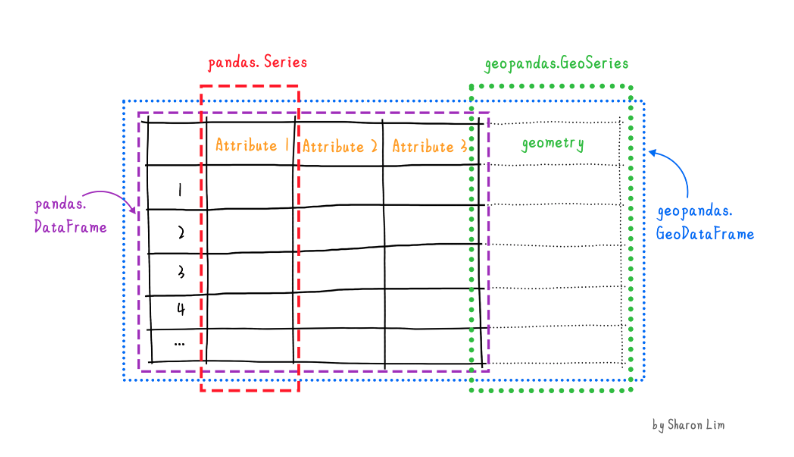

In this example we will explore 2 datasets, `swfynbos.gpkg`, a dataset of the vegetation types of the southwestern Cape of south Africa, and `fynbos_remnants`, a dtaset of the remaining fragments of naturla vegetation in this region. this data is in the geopacakage format but Geopandas can open all commonly encounted grospatial vector data formats

In [21]:
#we typically use the alias gpd
import geopandas as gpd

#read file
vegtypes = gpd.read_file('data/swfynbos.gpkg')

#view some rows
vegtypes.head()

Name_18 MAPCODE18  \
0  Atlantis Sand Fynbos      FFd4   
1  Atlantis Sand Fynbos      FFd4   
2  Atlantis Sand Fynbos      FFd4   
3  Atlantis Sand Fynbos      FFd4   
4  Atlantis Sand Fynbos      FFd4   

                                            geometry  
0  MULTIPOLYGON (((18.73707 -33.68504, 18.73760 -...  
1  MULTIPOLYGON (((18.76015 -33.58306, 18.76066 -...  
2  MULTIPOLYGON (((18.64270 -33.50115, 18.64216 -...  
3  MULTIPOLYGON (((18.65830 -33.49548, 18.65885 -...  
4  MULTIPOLYGON (((18.67123 -33.49252, 18.67070 -...

Before getting into some data manipulations, lets looks at some attributes of the data. Geopandas allows us to easlity access some relevant attributes of our data

In [ ]:
#the type of each geometry
print(vegtypes.type)

In [ ]:
#area of each polygon
print(vegtypes.area)

In [ ]:
#centroid of each polygon
print(vegtypes.centroid)

We can print the coordinate referecnesystems of the geodataframe using `.crs`

In [6]:
vegtypes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Doing things like filters, slecting columns and rows etc works exactly like a Pandas dataframe, as a geodataframe is a subclass of a dataframe

In [ ]:
#select first 5 rows
print(vegtypes.iloc[0:5])

In [ ]:
#filter to a single vegtypes
print(vegtypes.query('Name_18 == "Hangklip Sand Fynbos"').head())


Plotting is easy too. Like Pandas there is a hnady `.plot()` method for geodataframe. If we give it a colmn name as the first argument, it will olor the plot by that column

<Axes: >

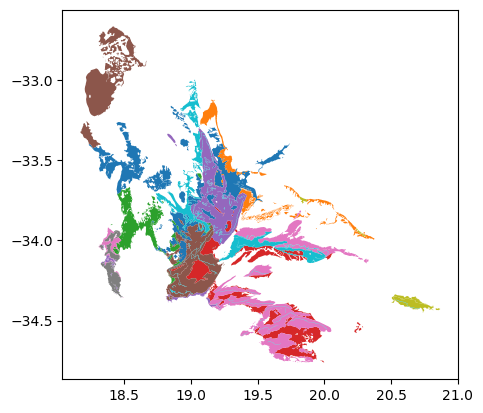

In [9]:
vegtypes.plot('Name_18')

## Geometric manipulations and joins

Before we start playing with manipluatioing geodataframes based on thier geometries, let load another datasets that we will combine with the first

In [22]:
remnants = gpd.read_file('data/remnants.gpkg')
#lets view the first few rows
remnants.head()

RLE2021  Endemic                                           geometry
0      LC  Endemic  MULTIPOLYGON (((17.10320 -28.46677, 17.10289 -...
1      LC  Endemic  MULTIPOLYGON (((17.25375 -28.79040, 17.25313 -...
2      LC  Endemic  MULTIPOLYGON (((17.58954 -29.56134, 17.58923 -...
3      LC  Endemic  MULTIPOLYGON (((17.58671 -29.57930, 17.58673 -...
4      LC  Endemic  MULTIPOLYGON (((17.69563 -29.74812, 17.69407 -...

#set operations
set operations like, intersections and unions can be applied using the `gpd.overlay()` funciton. lets extract teh remaining natural vegetation of each vegetation type

<Axes: >

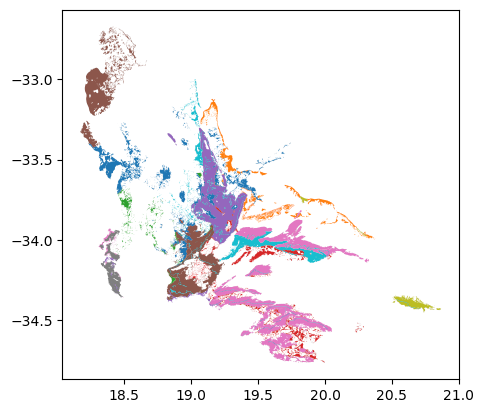

In [23]:
#intersection of vegtypes and remnants
veg_remnants = gpd.overlay(vegtypes,remnants,how='intersection')

#plot!
veg_remnants.plot('Name_18')

When executing set operations, the proporotes from both inut dataframes are retained, so each row in the outpu will have all the columns from the inputs

In [20]:
veg_remnants.head()

Name_18 MAPCODE18 RLE2021  Endemic  \
0  Atlantis Sand Fynbos      FFd4      CR  Endemic   
1  Atlantis Sand Fynbos      FFd4      CR  Endemic   
2  Atlantis Sand Fynbos      FFd4      CR  Endemic   
3  Atlantis Sand Fynbos      FFd4      EN  Endemic   
4  Atlantis Sand Fynbos      FFd4      EN  Endemic   

                                            geometry  
0  MULTIPOLYGON (((18.74560 -33.57731, 18.74559 -...  
1  POLYGON ((18.75564 -33.57943, 18.75566 -33.579...  
2  MULTIPOLYGON (((18.74138 -33.58110, 18.74144 -...  
3  POLYGON ((18.74125 -33.58128, 18.74147 -33.581...  
4  MULTIPOLYGON (((18.76906 -33.58237, 18.76920 -...

fainlly, lets combine all polygons with that same threat status together usiing `dissolve` to simplify our geodataframe

In [24]:
#all polygons with the saem threat status into one
veg_remnants_simple = veg_remnants.dissolve('RLE2021')
#view
veg_remnants_simple.head()

geometry  \
RLE2021                                                      
CR       MULTIPOLYGON (((18.35222 -34.15510, 18.35224 -...   
EN       MULTIPOLYGON (((18.24263 -33.41139, 18.24241 -...   
LC       MULTIPOLYGON (((18.26847 -33.42568, 18.26847 -...   
VU       MULTIPOLYGON (((18.42952 -33.99259, 18.42953 -...   

                      Name_18 MAPCODE18  Endemic  
RLE2021                                           
CR       Atlantis Sand Fynbos      FFd4  Endemic  
EN       Atlantis Sand Fynbos      FFd4  Endemic  
LC       Atlantis Sand Fynbos      FFd4  Endemic  
VU       Atlantis Sand Fynbos      FFd4  Endemic

There is tons more functionality in Geopandas, you can spatially join geodatframe with `.sjoin()`, reproject using `to_crs()`, and do all the good stuff you would expect. Two great places to dive deeper are the [GeoPandas user guide](https://geopandas.org/en/stable/docs/user_guide.html), and [the Carpentires lesson on Vectro data in Python](https://carpentries-incubator.github.io/geospatial-python/07-vector-data-in-python/index.html)

# Gridded data with Xarray

Xarray is the meat and potatoes of working with multidimensional gridded data in python. While numpy provides many of the core operations we need for working with gridded data like indexinsg , matrix operations etc it does not provide hte functionality to add information abouthte various dimensions of arrays, the coordiantes of grid cells or attached important metadata. THis is where xarray comes in.

By including labels on array dimensions xarray open up many new possibilities like:

- applying operations over dimensions by name: x.sum('time').

- selecting values by label x.sel(time='2014-01-01').

- use the split-apply-combine paradigm with groupby: x.groupby('time.dayofyear').mean().

- keeping track of arbitrary metadata in the form of a Python dictionary: x.attrs.

- and much more

Xarray data strucutre makes it trivial to go from 2 to 3 to 4 to N dimensions, henec it is a great chioce for working with imaging spectroscopy data where will will have at least 3 (lat, lon, wavelength) dimensions. Another big benrfit is that it seamless ly integrates with `Dask` a popular libraey for parallel computing in Python. This allos us to scale analysis woth Xarray to very large data



The core data stucutre of xarray is an `xarray.DataArray` - which in it's siplesst form is just a numpy array with named dimensions and coordinates on those dimensions. We can have multiple dataarrya ina single stucute an `xarray.Dataset`. Let see what this lloks like

In [12]:
#typically we use the xr aliais
import xarray as xr
import numpy as np

#create a 2x3 np array
arr = np.random.randn(2, 3)

#create a xarray.DataArray by naming the dims and giving them coordinates
da = xr.DataArray(arr,
                    dims=("x", "y"),
                    coords={"x": [10, 20],
                            "y": [1.1,1.2,1.3]})

da

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.54257861, -0.29662486, -0.52841675],
       [-0.39626085, -0.10554864,  0.33208688]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) float64 1.1 1.2 1.3

We can access the individual components like the data itsefl, the dimensio names or the cooridantes using accessors

In [ ]:
#get the actual data
print(da.values)

In [ ]:
#get teh dimenson names
print(da.dims)

In [ ]:
#get the x coordinates
print(da.x)

WE can set or get any metadata attibute we like

In [13]:
da.attrs["long_name"] = "random mesurement"
da.attrs["random_attribute"] = 123

print(da.attrs)

{'long_name': 'random mesurement', 'random_attribute': 123}


and perform calculations on `xarray.DataArrays` as if they were numpy arrays

In [14]:
da + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.54257861,  9.70337514,  9.47158325],
       [ 9.60373915,  9.89445136, 10.33208688]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) float64 1.1 1.2 1.3

In [16]:
np.sin(da)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.51634598, -0.29229414, -0.50416667],
       [-0.38597164, -0.10535277,  0.3260166 ]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) float64 1.1 1.2 1.3
Attributes:
    long_name:         random mesurement
    random_attribute:  123

An `xarray.Dataset` is a container of multiple aligned DataArray objects

In [18]:
#create a new dataarray with aligned dimensions (but it can one more or fewer)
#create a new 2x3x4 xarray Dataarray
arr2 = np.random.randn(2, 3,4)
da2 = xr.DataArray(arr2,
                    dims=("x", "y","z"),
                    coords={"x": [10, 20],
                            "y": [1.1,1.2,1.3],
                            "z": [20,200,2000,20000]})

#combine with anther xarray.DataArray to make a xarray.Dataset
ds = xr.Dataset({'foo':da,'bar':da2})
ds


<xarray.Dataset>
Dimensions:  (x: 2, y: 3, z: 4)
Coordinates:
  * x        (x) int64 10 20
  * y        (y) float64 1.1 1.2 1.3
  * z        (z) int64 20 200 2000 20000
Data variables:
    foo      (x, y) float64 0.5426 -0.2966 -0.5284 -0.3963 -0.1055 0.3321
    bar      (x, y, z) float64 -0.2736 0.2298 1.46 1.016 ... 0.2694 -2.057 2.094

Here you can see that we have multiple arrays in a single dataset. Xarray automatically aligns the arrays based on shared dimensions and coodrinates. You can do almost everything you can do with DataArray objects with Dataset objects (including indexing and arithmetic) if you prefer to work with multiple variables at once. You ca also easlily retirve a single DataArray by name

In [19]:
ds.foo
# ds['foo'] works the same

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.54257861, -0.29662486, -0.52841675],
       [-0.39626085, -0.10554864,  0.33208688]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) float64 1.1 1.2 1.3
Attributes:
    long_name:         random mesurement
    random_attribute:  123

## Terminology
It is important to be precise with our terminology when dealing with xarrays as things can quickly get confusing when wokring with many dims. The full glossary can be found [here](https://docs.xarray.dev/en/stable/user-guide/terminology.html), but a quick recap:
- `xarray.DataArray` - A multi-dimensional array with labeled or named dimensions
- `xarray.Dataset` - A collection of DataArrays with aligned dimensions
- **Dimension** - The (named) axes of an array
- **Coordinate** - An array that labels a dimension

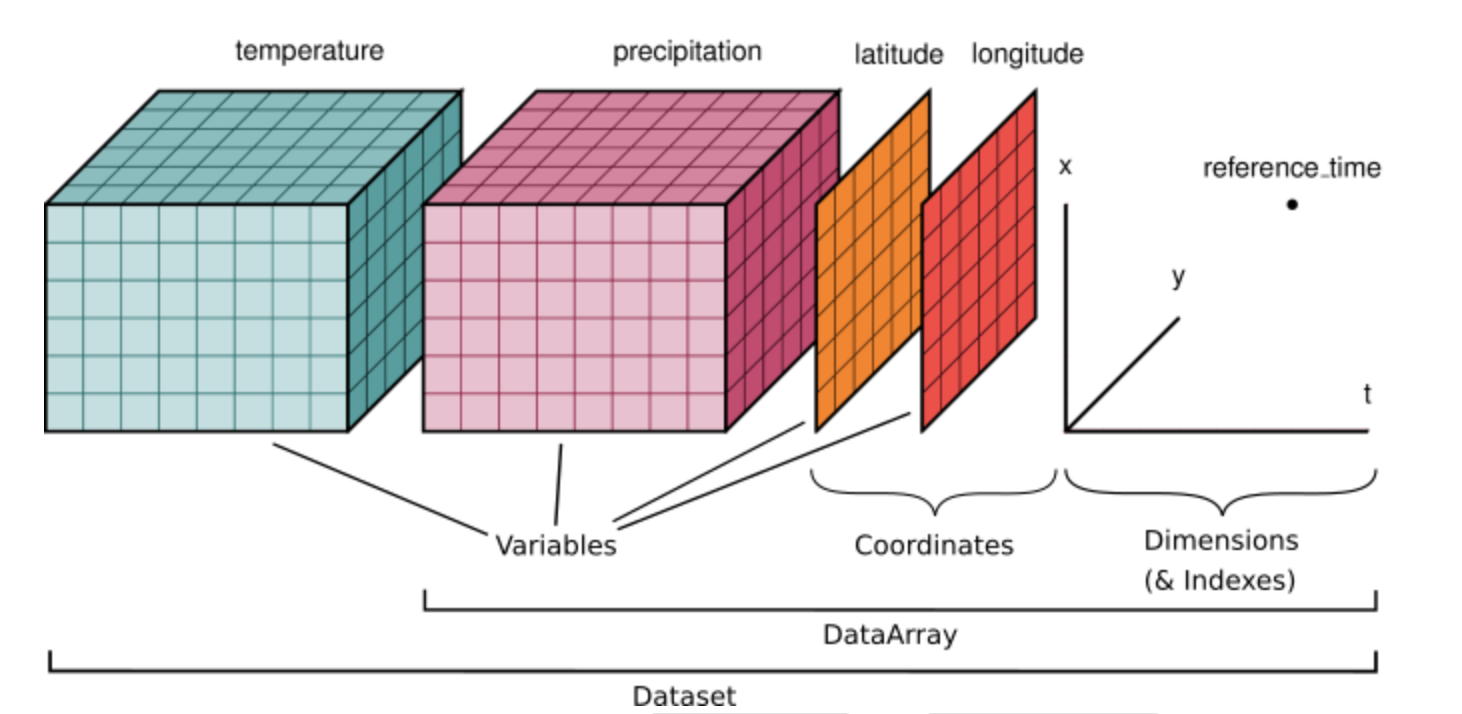

## loading data rom files

Xarray supports reading and writing of several file formats, from simple Pickle files to the more flexible netCDF format. The recommended way to store xarray data structures is netCDF. Xarray is based on the netCDF data model, so netCDF files on disk directly correspond to Dataset objects. If you aren’t familiar with this data format, the [netCDF FAQ](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#What-Is-netCDF) is a good place to start. When we are working with complex multidimensional data, file format start to matter alot, and they make a big difference to how fast and efficiently we can load and analyse data. More on this in the next lesson.

We can load netCDF files to create a new Dataset using `open_dataset()`. Similarly, a DataArray can be saved to disk using the `DataArray.to_netcdf()` method

In [14]:
import xarray as xr
import numpy as np

In [75]:
da_is = xr.open_dataset("data/is_example.nc")
da_is

<xarray.Dataset>
Dimensions:      (wl: 267, x: 250, y: 250)
Coordinates:
  * wl           (wl) float64 0.4066 0.4134 0.4201 0.4269 ... 2.383 2.389 2.395
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) int16 ...

## indexing and selecting and masking

while you can use numpy like indexing, this does not make use of the power of having named dims and coords

In [24]:
da_is.isel(x=20,y=20,wl=slice(0,20))

<xarray.Dataset>
Dimensions:      (wl: 20)
Coordinates:
  * wl           (wl) float64 0.4066 0.4134 0.4201 ... 0.5222 0.529 0.5359
    x            float64 3.173e+05
    y            float64 6.263e+06
Data variables:
    reflectance  (wl) int16 ...

In [25]:
da_is.sel(x=3.175e+05,y=6.263e+06,method='nearest')

<xarray.Dataset>
Dimensions:      (wl: 267)
Coordinates:
  * wl           (wl) float64 0.4066 0.4134 0.4201 0.4269 ... 2.383 2.389 2.395
    x            float64 3.175e+05
    y            float64 6.263e+06
Data variables:
    reflectance  (wl) int16 ...

In [16]:
# drop bad bands
da_is = da_is.where(da_is.wl < 2.1,drop=True)
da_is

<xarray.Dataset>
Dimensions:      (wl: 218, y: 250, x: 250)
Coordinates:
  * wl           (wl) float64 0.4066 0.4134 0.4201 0.4269 ... 2.082 2.088 2.095
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) float32 39.0 24.0 32.0 ... 1.613e+03 1.702e+03

## Grouping and aggregation

In [17]:
bins = np.arange(da_is.wl.min(),da_is.wl.max(),0.1)

In [18]:
da_bin = da_is.groupby_bins("wl", bins).mean()
da_bin

<xarray.Dataset>
Dimensions:      (x: 250, y: 250, wl_bins: 16)
Coordinates:
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
  * wl_bins      (wl_bins) object (0.407, 0.507] ... (1.907, 2.007]
Data variables:
    reflectance  (wl_bins, y, x) float32 98.07 92.86 ... 1.368e+03 1.468e+03

You may notice that often it takes almost no time at all to run xarray code. This is because for many function xarray does not load data from disk and actually perform the calculation, rather it simply print a summary and high-level overview of the data that will be produced. This is called **Lazy computation** and is the smart thing to do when working with large datasets. Only when you really need to do the calculation does it actually happen - like when calling `.plot()` or writing results. We can force computation by running `xarray.DataArray.compute()`

In [29]:
da_bin.compute()

<xarray.Dataset>
Dimensions:      (x: 250, y: 250, wl_bins: 16)
Coordinates:
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
  * wl_bins      (wl_bins) object (0.407, 0.507] ... (1.907, 2.007]
Data variables:
    reflectance  (wl_bins, y, x) float32 98.07 92.86 ... 1.368e+03 1.468e+03

## plotting

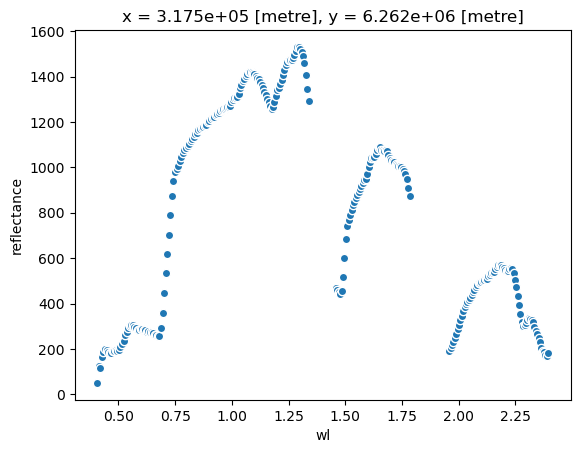

In [94]:
pixel = da_is.sel(x=3.175e+05,y=6.2625e+06,method='nearest')
pixel.reflectance.plot.scatter()

In [81]:
rgb=[0.66,0.56,0.48]

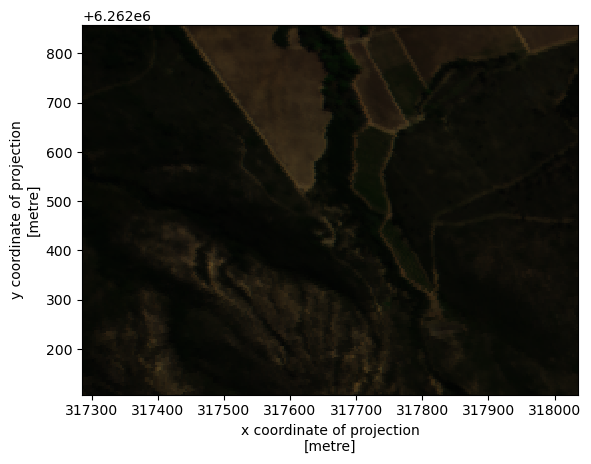

In [76]:
rgbplot = da_is.sel(wl=rgb,method='nearest')/10000
rgbplot.reflectance.plot.imshow()

In [39]:
import holoviews as hv
import hvplot.xarray


In [34]:
rgbplot.reflectance.hvplot.rgb(x='x', y='y', bands='wl', aspect = 'equal', frame_width=400)

:RGB   [x,y]   (R,G,B)

In [95]:
pixel.hvplot.scatter(y='reflectance',x='wl', color='black', frame_width=400)

:Scatter   [wl]   (reflectance)

In [37]:
da_is.reflectance.hvplot(x='x', y='y', groupby='wl', aspect = 'equal', frame_width=400)

:DynamicMap   [wl]
   :Image   [x,y]   (reflectance)

# Scaling computaiton with Dask

Xarray integrates with Dask to support parallel computations and streaming computation on datasets that don’t fit into memory. Currently, Dask is an entirely optional feature for xarray. However, the benefits of using Dask are sufficiently strong that Dask may become a required dependency in a future version of xarray.

In [1]:
import dask.array as da
import numpy as np
data = np.arange(100_000).reshape(200, 500)
a = da.from_array(data, chunks=(100, 100))
a

dask.array<array, shape=(200, 500), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

Now we have a 2D array with the shape (200, 500) composed of 10 chunks where each chunk has the shape (100, 100). Each chunk represents a piece of the data, and is just a normal np.array.  

We can execute most numpy functions on dask arrays. The difference is that they will not return the result, but rather just a reference to the yet-to-be initiated computation.

In [2]:
a.mean()

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

Remember, to actual compute the results we need to call `.compute()`. This will return the result as a numpy array or list. 

In [3]:
a.mean().compute()

49999.5

We can force computation but keep the result in a chunked dask array by calling `.persist()`. This wont make much difference here, but we will see why this matters later.

We can chain operation together to create a more complex operation


In [4]:
b = da.from_array(data*10, chunks=(100, 100))
c = a + b
d = c.mean()

In [5]:
d.visualize(engine="cytoscape")

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'BT', 'nodeSep': 10, 'edgeSep': 10, 'spacingFact…

### But how does this parallelize work and allow us to scale to very large datasets you ask?

Well, by splitting our array up into a collection of smaller chunks, and building a graph of operations to perform on these chunks we have split what might have originally been an single operation too large for our machine into many smllaer operations. We can now pick as many of these operations as we like at a time to perfrm in parallel. We can also optimze the size of each chunk such that we get the right balance between one large chunk too big to fit in memoery and many millions of chunks that would result in unmanagbely large graphs

The final piece of the puzzle is managing the workers that execute the units of work we have created, this is done by the Scheduler. Dask provides a few options to do this. The simplest way is the default and it happens in the background when you do a computation on a dask array on a single machine automatically.

The details of how this works is beyond the scope here, but here is how I think about it (I am probably wrong):  
  
The shedulers creates a 'pool' of threads to which it can allocates work (often n workers = n cores). A thread pool in Python is like a team of workers. You specify how many workers (threads) are in the team. You give the team a list of tasks. Each worker is assinged a task from the list and does it. If all workers are busy, the remaining tasks wait. When a worker finishes a task, it picks up a new one from the list. This way, tasks are done concurrently, but the number of workers doing the tasks doesn't exceed the limit you set.  

The scheduler keeps track of all the tasks completed, running and queued. It knows which tasks depend on which data, what data is available, and what data is waiting on what tasks to complete before it can be released.

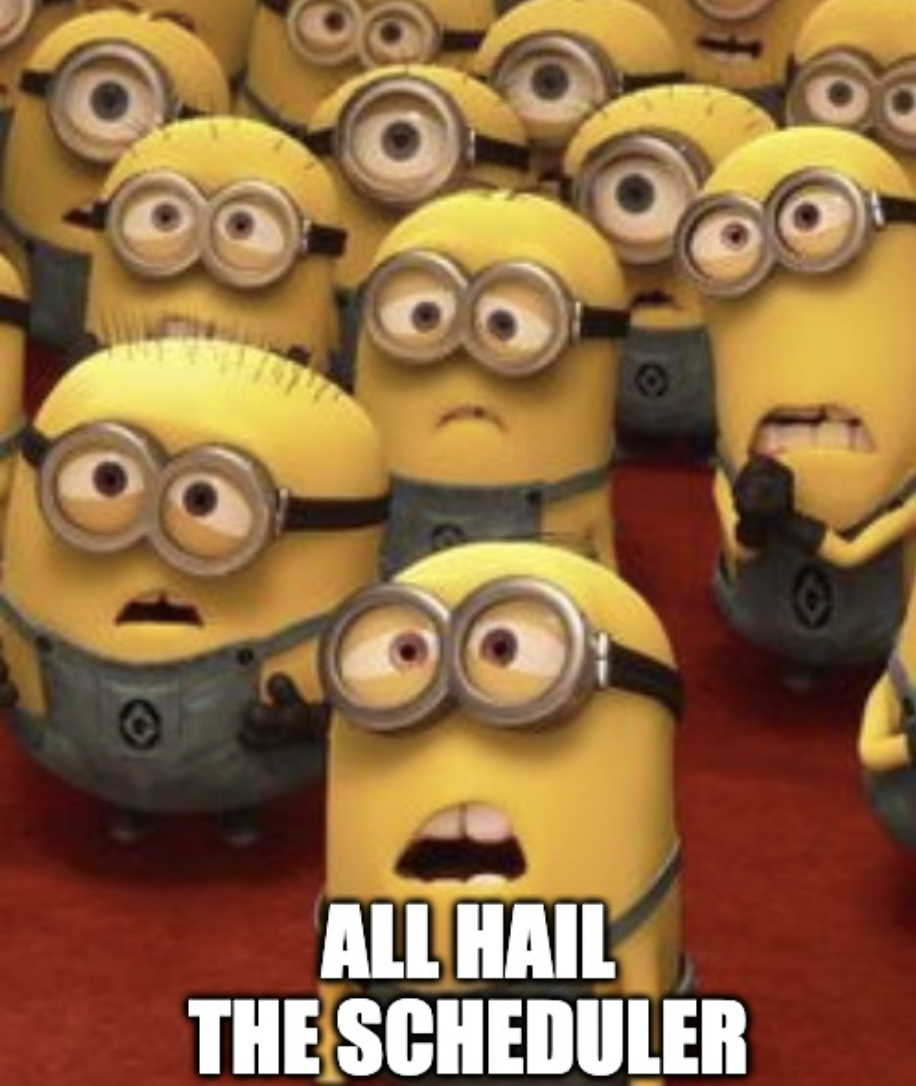

Now you have enough info to understand the overwie image below which provide an overviw of how dask works:

Operations on **Collections** created a **Task Graph**. A task graph is then executed by a sheduler. We have seen the `dask.array` collection, but there are others like `dask.dataframe`. We have already wor with the default single-machine sheduler, but to scale to large datasets we need to use the Distributed Scheduler.

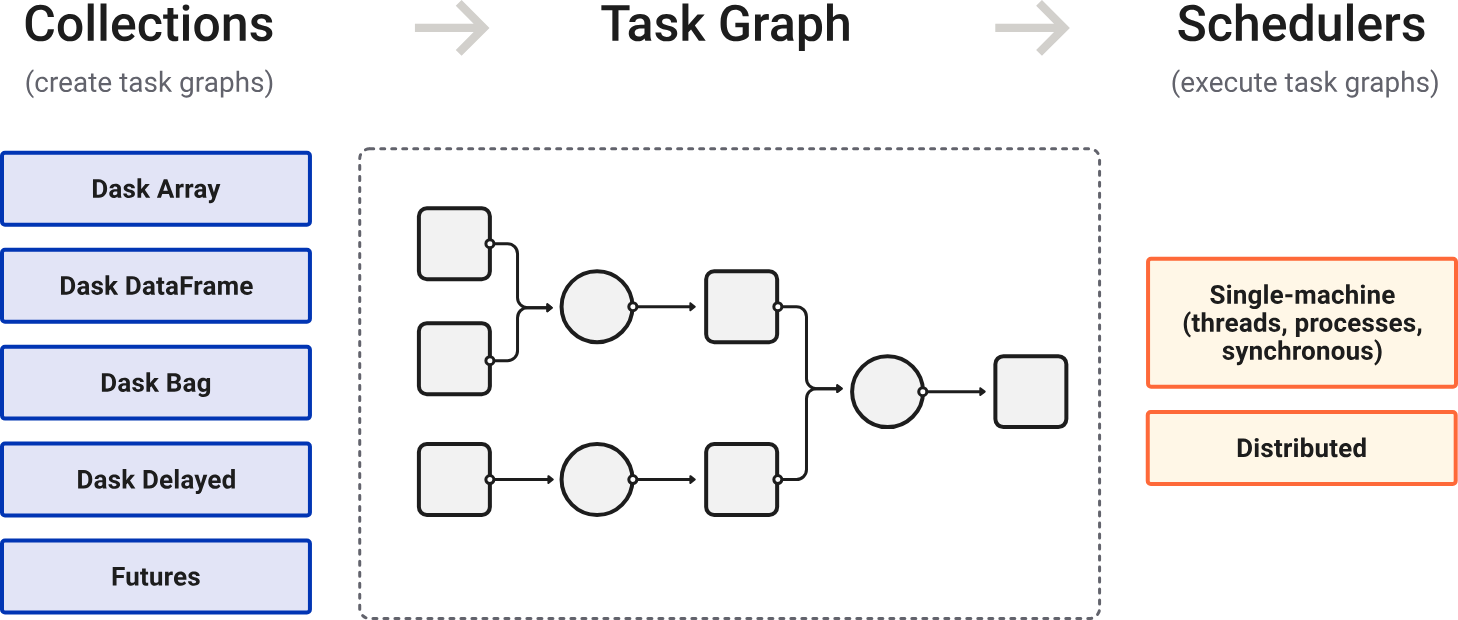

### Dask.distributed

The disrtibuted scheduler is more sophisticated, offers more features, and can run locally or distributed across a cluster. The downside is that to setup a distrbuted cluster with multiple worker machines take a bit of work. Fortunlay w can run the disrtibuted scheduler on a single without much setup, and we get. A bunch of extra features that we dont get with the default dask scheduler.

If you want to find out about seting up a distirubted schedular acorss a cluster you can read more [here](https://docs.dask.org/en/latest/deploying.html). [Coiled](https://www.coiled.io/) is a great service thast simplieifed seting up a dask cluster across multiple cloud machines.

For the rest of this exercise we will use the disrtibuted scheduleron a local machine, but all the feautes demoed will wor the same if you use a dask cluster.

In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=2)  # Launches a distributed scheduler and workers locally
client = Client(cluster)  # Connect to distributed scheduler and override default
client

<Client: 'tcp://127.0.0.1:58563' processes=2 threads=4, memory=8.00 GiB>

click on the dashboard link. It will open a tab but there wont be much there yet.
Lets esecute the computational grpah we created earlier. 
Lets make it ba bit bigger so that we actually have some work to do

In [6]:
data = np.arange(20000000).reshape(2000, 10000)
a = da.from_array(data, chunks=(100, 100))
b = da.from_array(data*10, chunks=(100, 100))
c = a + b
d = c.mean()

In [7]:
d.compute()

/Users/glennmoncrieff/mambaforge/envs/ispython/lib/python3.10/site-packages/distributed/client.py:3141: UserWarning: Sending large graph of size 305.53 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


109999994.5

Now go to the dashboard.
There are numerous diagnostic plots available on the landing page.

 - __Bytes Stored and Bytes per Worker__:  
 These two plots show a summary of the overall memory usage on the cluster (Bytes Stored), as well as the individual usage on each worker (Bytes per Worker).
 
 - __Task Processing/CPU Utilization/Occupancy/Data Transfer__:  
  The Processing tab in the figure shows the number of tasks that have been assigned to each worker. Not all of these tasks are necessarily executing at the moment: a worker only executes as many tasks at once as it has threads.
- __Progress__: The progress bars plot shows the progress of each individual task type. The color of each bar matches the color of the individual tasks on the task stream from the same task type

 - __Task Stream__: The task stream is a view of which tasks have been running on each thread of each worker. It allows us to see not only the current activity but the pawt too. Each row represents a thread, and each rectangle represents an individual task. The color for each rectangle corresponds to the task type of the task being performed, and matches the color of the Progress plot.  

  In some scenarios, the dashboard will have white spaces between each rectangle. During that time, the worker thread was idle. Having too much white space is an indication of sub-optimal use of resources. Additionally, a lot of long red bars (transfers) can indicate a performance problem, due to anything from too large of chunksizes, too complex of a graph, or even poor scheduling choices.
  The task stream is the quickets way to diagnoise of your computation has any issues. The example below show you waht the task stream for a healthy and unhealthy computation migh look liee


An example of a healthy Task Stream, with little to no white space.

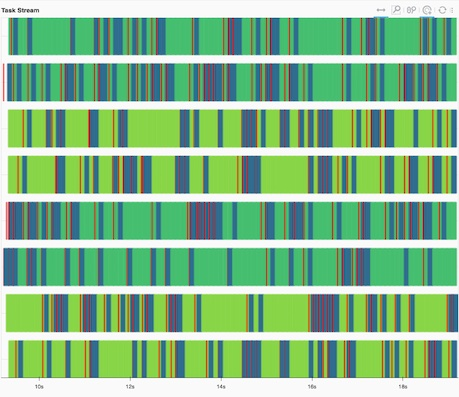

An example of an unhealthy Task Stream, with a lot of white space. Workers were idle most of the time. Additionally, there are some long transfers (red) which don’t overlap with computation.

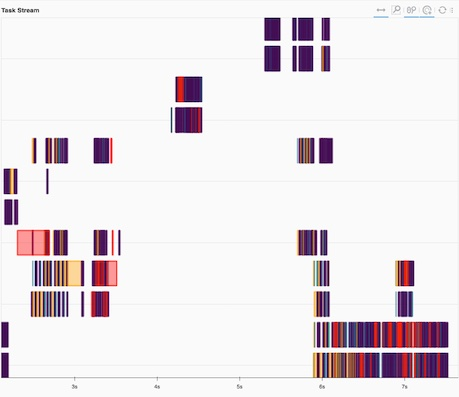

This was just a quick tour, tge dask dashboard is very powerful and the first place to look when you want to understnad your computation. Read more about it [here](https://docs.dask.org/en/stable/dashboard.html) or watch this great [Youtube video](https://youtu.be/N_GqzcuGLCY) by dask creator Matthew Rocklin

### Chuxdking is important

The chunks parameter has critical performance implications when using Dask arrays. If your chunks are too small, queueing up operations will be extremely slow, because Dask will translate each operation into a huge number of operations mapped across chunks. Computation on Dask arrays with small chunks can also be slow, because each operation on a chunk has some fixed overhead from the Python interpreter and the Dask task executor.

Conversely, if your chunks are too big, some of your computation may be wasted, because Dask only computes results one chunk at a time. You may also run out of memory

A good rule of thumb is to create arrays with a minimum chunksize of at least one million elements (e.g., a 1000x1000 matrix). With large arrays (10+ GB), the cost of queueing up Dask operations can be noticeable, and you may need even larger chunksizes.

For performance, a good choice of chunks follows the following rules:

 - A chunk should be small enough to fit comfortably in memory. We’ll have many chunks in memory at once

 - A chunk must be large enough so that computations on that chunk take significantly longer than the 1ms overhead per task that Dask scheduling incurs. A task should take longer than 100ms

 - Chunk sizes between 10MB-1GB are common, depending on the availability of RAM and the duration of computations

 - Chunks should align with the computation that you want to do.  
 For example, if you plan to frequently slice along a particular dimension, then it’s more efficient if your chunks are aligned so that you have to touch fewer chunks. If you want to add two arrays, then its convenient if those arrays have matching chunks patterns

 - Array data formats are often chunked as well. When loading or saving data, if is useful to have Dask array chunks that are aligned with the chunking of your storage

# Xarray and dask

Now let's spinlkle some of that tasty dask spice onto our xarrays
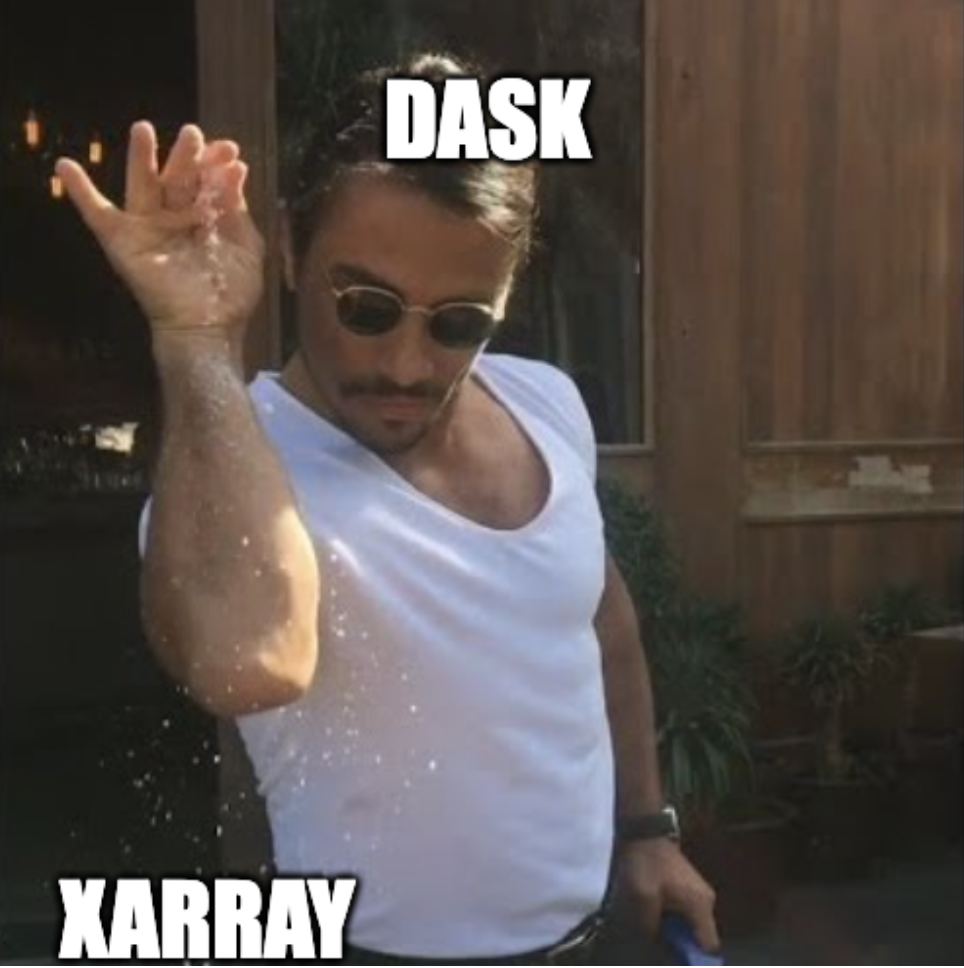


xarray is built to natively work with dask arrays. The data in your xarray can be either a np.array or a dask.array. Almost all xarray functions work on both.

To convert an xarray with data in a numpy array to a dask array you just need to specify the chunking using `.chunk`. You can also load data directy into a dask array by including the `chunks` argument when using `xr.open_dataset`.

In [1]:
import xarray as xr

In [3]:
da_chunk = xr.open_dataset("data/is_example.nc",chunks={'x':50,'y':50,'wl':-1})
da_chunk

<xarray.Dataset>
Dimensions:      (wl: 267, x: 250, y: 250)
Coordinates:
  * wl           (wl) float64 0.4066 0.4134 0.4201 0.4269 ... 2.383 2.389 2.395
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
Data variables:
    reflectance  (wl, y, x) int16 dask.array<chunksize=(267, 50, 50), meta=np.ndarray>

### I'll say it again. Chunking matters
Above I specified that we would split that data into chunks aloing the x and y dims and not along the wavelength dim. This means that when I perform an operation, the algorythm will nly see a subset of the full spatial domain at once, but all of the bands. If we expect that our analysis will mostly inlove calculation that considers each pixel idenpendenlty, but will needs all the bands (like spectral resampling) this makes sense. However, we might want to chunk differently if our plan was to calculate neighbourhood statistics on each band indenpendenlty as we might then nned to see a large spatial subset of the data at once.

The ppoint of this is, you need to think about how you plan to analyse the data to determine how to chunk it

### Default chunking and rechunking
Some file types like netCDF or zarr have native chunking, and it is usually most efficient to use the chunking that is alreday present. If you specify `chunks='auto'` chunking will be automatically determined. This is a major advantage as chunking/rechunking can be expensive for large files. The downside is that you are subject to the chuning chosen by the creater of the file. 

YOu always have the option of changing the chunking by just applying `.chunk()` again later in your workflow. Thi can make sense if you are about to use algorthym formewhiuch a different chunking scheme is appropriate. But beware of doing this unnessaasrlily.


Lets try our spectral resampling again, this time using a chunked array

In [19]:
da_bin = da_chunk.groupby_bins("wl", bins).mean()

Remember, nothing will happend until will call `.compute()`

In [22]:
da_bin.compute()

<xarray.Dataset>
Dimensions:      (x: 250, y: 250, wl_bins: 16)
Coordinates:
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
  * wl_bins      (wl_bins) object (0.407, 0.507] ... (1.907, 2.007]
Data variables:
    reflectance  (wl_bins, y, x) float64 98.07 92.86 ... 1.368e+03 1.468e+03

You can see thsat forcing computation using `compute()` returned a numpoy array. If we want to force computation but keep the resuling array as a chunked dask array we can use `persist()` instead.

In [24]:
da_bin.persist()

<xarray.Dataset>
Dimensions:      (x: 250, y: 250, wl_bins: 16)
Coordinates:
  * x            (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y            (y) float64 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06
  * wl_bins      (wl_bins) object (0.407, 0.507] ... (1.907, 2.007]
Data variables:
    reflectance  (wl_bins, y, x) float64 dask.array<chunksize=(1, 50, 50), meta=np.ndarray>

### Automatic parallelization with `apply_ufunc()`


Almost all of xarray’s built-in operations work on Dask arrays. If you want to use a function that isn’t wrapped by xarray, use `apply_ufunc()` to apply functions that consume and return NumPy arrays. `apply_ufunc()` will apply a embarasinlgy parallel custom functions to each chunk. The function will receive each chunk as a `np.array` and should return a `np.array`. 

Lets look at a simple example. Unit-vecotr normailziation is a common transformation applied to spectra to remove the infleucen of the absolute magnitue of reflectance, and esnurenthat onl the shape of spectra are relevant for subseuenct analyses. After applying uv normalization all or bands/wavelengths should sum to 1. 

Here is a function to calculate the uv norm on a np.array



In [25]:
def normwl(arr: np.array):
    # Calculate the magnitude along the wavelength dimension
    magnitude = np.sum(arr, axis=0, keepdims=True)
    # Normalize the array along the wavelength dimension
    normalized_tensor = arr / magnitude
    return normalized_tensor


In [26]:
import numpy as np

ufunc

In [27]:
da_norm = xr.apply_ufunc(
    normwl,
    da_chunk['reflectance'],
    dask = "parallelized",
    output_dtypes=[int])

da_norm.persist()

<xarray.DataArray 'reflectance' (wl: 267, y: 250, x: 250)>
dask.array<transpose, shape=(267, 250, 250), dtype=int64, chunksize=(267, 50, 50), chunktype=numpy.ndarray>
Coordinates:
  * wl       (wl) float64 0.4066 0.4134 0.4201 0.4269 ... 2.383 2.389 2.395
  * x        (x) float64 3.173e+05 3.173e+05 3.173e+05 ... 3.18e+05 3.18e+05
  * y        (y) float64 6.263e+06 6.263e+06 6.263e+06 ... 6.262e+06 6.262e+06

# Make it Geospatial

although we hav latitude and longitude values associated with our xarray, this data is not a proper geosptail dataset and hence we cannot do spatial manipulations like calculating distances or reprojecting. Xarray is a generla prpose tool for any multidimensnal data and is not specifig to geosptail data. We need an addional package `rioxarray` which bring all of the power of `GDAL` to xarrays. `rioxarray` extends xarray with the rio accessor. what this means is that a bunch of new functions become available to xarray instances by typing `xarray.DataArray.rio.` 

In [51]:
import rioxarray

The first most important detial we are mossing to turn our xarray into a geosptial dataset is information aobut the projections. Here we know the current crs is epsg:32734 (UTM zone 34S) 

In [52]:
da_chunk = da_chunk.rio.write_crs('epsg:32734')
da_chunk.rio.crs

CRS.from_epsg(32734)

In [53]:
da_chunk_wgs = da_chunk.rio.reproject('epsg:4326')
da_chunk_wgs

<xarray.Dataset>
Dimensions:      (x: 277, y: 232, wl: 267)
Coordinates:
  * x            (x) float64 19.03 19.03 19.03 19.03 ... 19.04 19.04 19.04 19.04
  * y            (y) float64 -33.76 -33.76 -33.76 ... -33.77 -33.77 -33.77
  * wl           (wl) float64 0.4066 0.4134 0.4201 0.4269 ... 2.383 2.389 2.395
    spatial_ref  int64 0
Data variables:
    reflectance  (wl, y, x) int16 -32768 -32768 -32768 ... -32768 -32768 -32768

In [54]:
vclip = veg_remnants_simple.buffer(0)

now that we are in tthe same utm zone as our vector data. let clip our raster tob the vector data toextract only the intact natural vegetation of the vegetation type we are interest in

In [58]:
da_clip = da_chunk_wgs.rio.clip(vclip)

In [98]:
da_clip.hvplot(x='x', y='y', groupby='wl', aspect = 'equal', frame_width=400,clim=(0, 5000),cmap='nipy_spectral')

rioxarray gives us the abiuloty to read and write any fiel format supported by gdal. This is as simple as `rioarray.open_rasterio()` and `xarray.DataArray.rio.to_raster()`

## credits:

This lesson has borrowed heavily from:    

[Te Carpentries Geospatial Python lesson by Ryan Avery](https://carpentries-incubator.github.io/geospatial-python/)  

[The geopandas user guide](https://geopandas.org/en/stable/docs/user_guide.html)  

[The xarray user guide](https://docs.xarray.dev/en/stable/user-guide/index.html)  
